In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

TFile *file = TFile::Open("Tracks_Clusters.root"); 
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

Extracting and defining the necessary objects

In [2]:
//----------Event weight
float evtw = -1; tree->SetBranchAddress("EventWeight", &evtw);

//----------R4
vector<float> *reco_R4_pt;  tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
vector<float> *truth_R4_pt; tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);
vector<float> *TJ_R4_pt;    tree->SetBranchAddress("TrackJets_R4_pt", &TJ_R4_pt);
vector<float> *reco_R4_jvf; tree->SetBranchAddress("RecoJets_R4_jvf", &reco_R4_jvf);

//----------all plots
int nentries, nbytes, i; nentries = (Int_t)tree->GetEntries();

//----------pileup
UInt_t npv = -1; tree->SetBranchAddress("NPV", &npv);
// float mu = -1;
// tree->SetBranchAddress("mu_average", &mu);

Leading jet pT and all jets pT

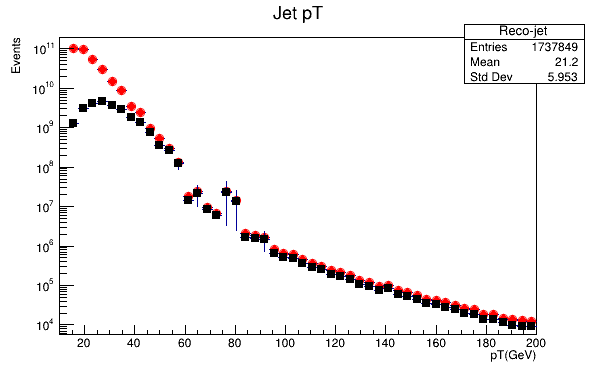

In [3]:
TH1F *hist_leadreco_pt = new TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_reco_pt = new TH1F("Reco-jet","Jet pT; pT(GeV);Events",50,10,200);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
        hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,evtw);  
        for(int j=0; j < reco_R4_pt->size(); j++){
            hist_reco_pt->Fill(reco_R4_pt->at(j)/1000.,evtw);     
        }
    }
}

TCanvas *canvas = new TCanvas("Canvas","",600,400);
hist_reco_pt->SetMarkerStyle(20);
hist_reco_pt->SetMarkerColor(kRed);
hist_reco_pt->Draw("");
hist_leadreco_pt->SetMarkerStyle(21);
hist_leadreco_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

<b>Excercises: 
    1. Compare the leading truth jet pT with the leading reco jet pT, with and without event weights.
    2. Repeat for all jets pT.
</b>

### 1.1 with event weight ###

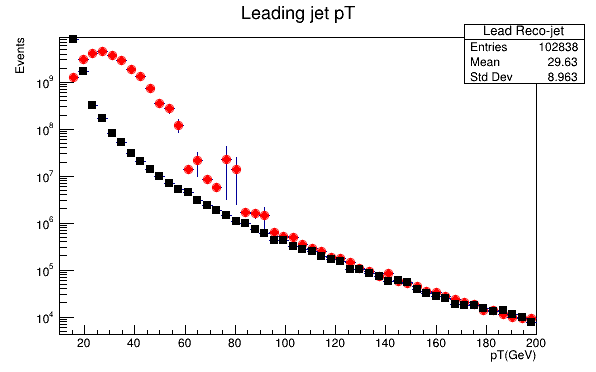

Warning in <TFile::Append>: Replacing existing TH1: Lead Reco-jet (Potential memory leak).


In [4]:
TH1F *hist_leadreco_pt = new TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruth_pt = new TH1F("Lead Truth-jet","Leading jet pT; pT(GeV);Events",50,10,200);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0) {hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,evtw);}
    if(truth_R4_pt->size()>0) {hist_leadtruth_pt->Fill(truth_R4_pt->at(0)/1000.,evtw);}  
}

hist_leadreco_pt->SetMarkerStyle(20);
hist_leadreco_pt->SetMarkerColor(kRed);
hist_leadreco_pt->Draw("");
hist_leadtruth_pt->SetMarkerStyle(21);
hist_leadtruth_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

### 1.2 without event weight ###

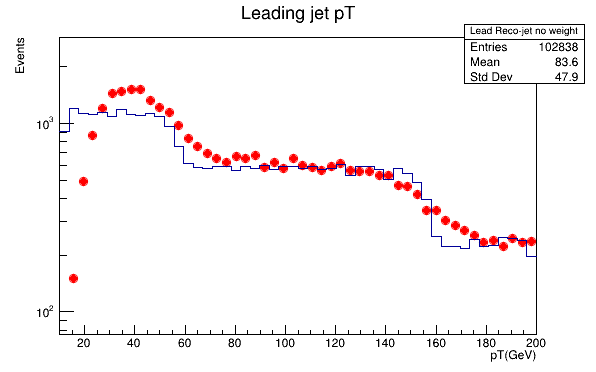

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [5]:
TH1F *hist_leadreco_pt_no_weight = new TH1F("Lead Reco-jet no weight","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruth_pt_no_weight = new TH1F("Lead Truth-jet no weight","Leading jet pT; pT(GeV);Events",50,10,200);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0) {hist_leadreco_pt_no_weight->Fill(reco_R4_pt->at(0)/1000.);}
    if(truth_R4_pt->size()>0) {hist_leadtruth_pt_no_weight->Fill(truth_R4_pt->at(0)/1000.);}
}

TCanvas *canvas = new TCanvas("Canvas","",600,400);
hist_leadreco_pt_no_weight->SetMarkerStyle(20);
hist_leadreco_pt_no_weight->SetMarkerColor(kRed);
hist_leadreco_pt_no_weight->Draw("p");
hist_leadtruth_pt_no_weight->SetMarkerStyle(21);
hist_leadtruth_pt_no_weight->Draw("same");
canvas->SetLogy();
canvas->Draw();

### 2.1 all jets with event weight ###

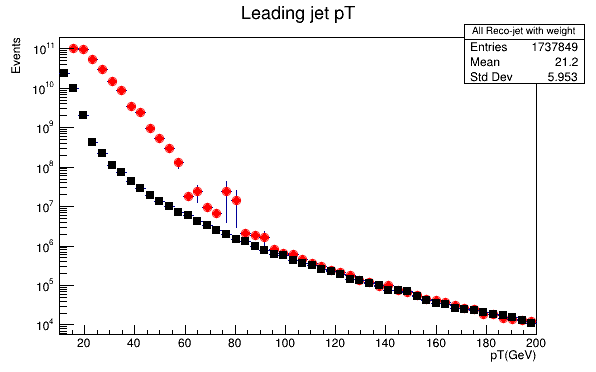

In [6]:
TH1F *hist_reco_all_pt_weight = new TH1F("All Reco-jet with weight","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_truth_all_pt_weight = new TH1F("All Truth-jet with weight","Leading jet pT; pT(GeV);Events",50,10,200);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
        for(int j=0; j < reco_R4_pt->size(); j++) {hist_reco_all_pt_weight->Fill(reco_R4_pt->at(j)/1000.,evtw);}
    }  
    if(truth_R4_pt->size()>0){
        for(int j=0; j < truth_R4_pt->size(); j++) {hist_truth_all_pt_weight->Fill(truth_R4_pt->at(j)/1000.,evtw);}
    }
}

hist_reco_all_pt_weight->SetMarkerStyle(20);
hist_reco_all_pt_weight->SetMarkerColor(kRed);
hist_reco_all_pt_weight->Draw("p");
hist_truth_all_pt_weight->SetMarkerStyle(21);
hist_truth_all_pt_weight->Draw("same");
canvas->SetLogy();
canvas->Draw();

### 2.2 all jets without event weight ###

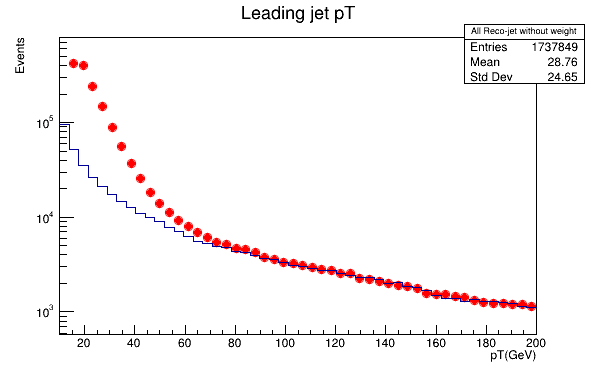

In [7]:
TH1F *hist_reco_all_pt_no_weight = new TH1F("All Reco-jet without weight","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_truth_all_pt_no_weight = new TH1F("All Truth-jet without weight","Leading jet pT; pT(GeV);Events",50,10,200);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
        for(int j=0; j < reco_R4_pt->size(); j++) {hist_reco_all_pt_no_weight->Fill(reco_R4_pt->at(j)/1000.);}}    
    if(truth_R4_pt->size()>0){
        for(int j=0; j < truth_R4_pt->size(); j++) {hist_truth_all_pt_no_weight->Fill(truth_R4_pt->at(j)/1000.);}}
}

hist_reco_all_pt_no_weight->SetMarkerStyle(20);
hist_reco_all_pt_no_weight->SetMarkerColor(kRed);
hist_reco_all_pt_no_weight->Draw("p");
hist_truth_all_pt_no_weight->SetMarkerStyle(21);
hist_truth_all_pt_no_weight->Draw("same");
canvas->SetLogy();
canvas->Draw();

-----------------------

Now we will study the jets pileup dependence / Plot jet pt vs. pileup / Fill the histograms: Make a cut to accept events with at least one jet and require the leading jet to have pT above 20 GeV

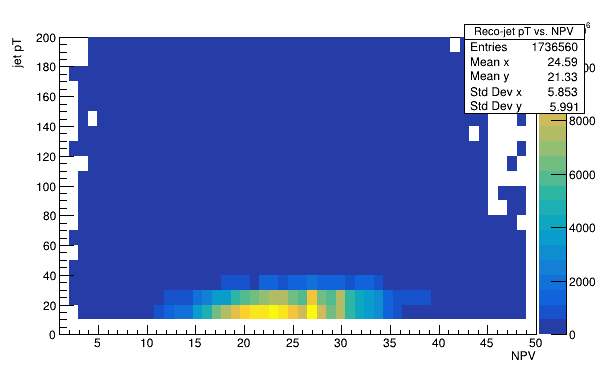

In [8]:
TH2F *hist_jetpt_npv = new TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
TProfile *prof_jetpt_npv = new TProfile("Profile Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 0, 200);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        for(int j=0; j<reco_R4_pt->size(); j++){
//             hist_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
//             prof_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
            hist_jetpt_npv->Fill(npv, reco_R4_pt->at(j)/1000.,evtw);
            prof_jetpt_npv->Fill(npv, reco_R4_pt->at(j)/1000.,evtw);            
        }
    }
}

TCanvas *canvas2 = new TCanvas("Canvas2","",600,400);
hist_jetpt_npv->Draw("colz");
canvas2->Draw();

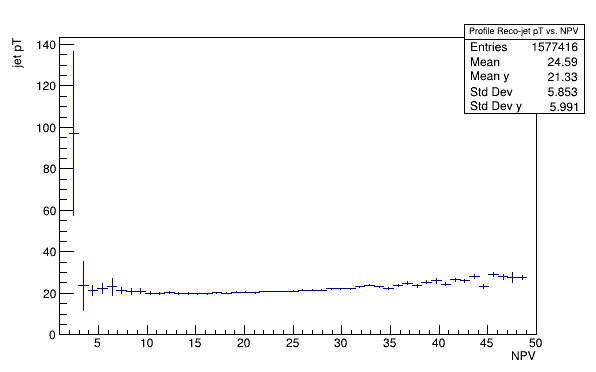

In [9]:
prof_jetpt_npv->Draw(""); canvas2->Draw();

<b>Excercise: 
3. Make plots for reco and truth jet pT vs. pileup. Interpret your results. 
</b>

### 3.1 Trackjets pT vs NPV ###

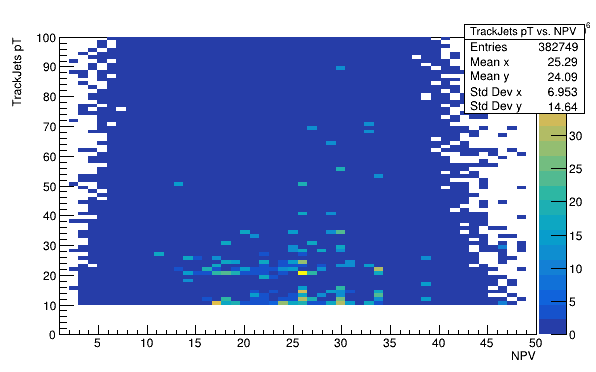

In [10]:
TH2F *hist_TJpt_npv = new TH2F("TrackJets pT vs. NPV",";NPV; TrackJets pT",50,1,50, 80, 0, 100);
TProfile *prof_TJpt_npv = new TProfile("Profile TrackJets pT vs. NPV",";NPV; TrackJets pT",50,1,50, 0, 200);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    if(TJ_R4_pt->size()!=0 && TJ_R4_pt->at(0)>20000.){
        for(int j=0; j<TJ_R4_pt->size(); j++){
        hist_TJpt_npv->Fill(npv, TJ_R4_pt->at(j)/1000.,evtw);
        prof_TJpt_npv->Fill(npv, TJ_R4_pt->at(j)/1000.,evtw);
        }
    }
}

TCanvas *canvas31 = new TCanvas("Canvas31","",600,400);
hist_TJpt_npv->Draw("colz");
canvas31->Draw();

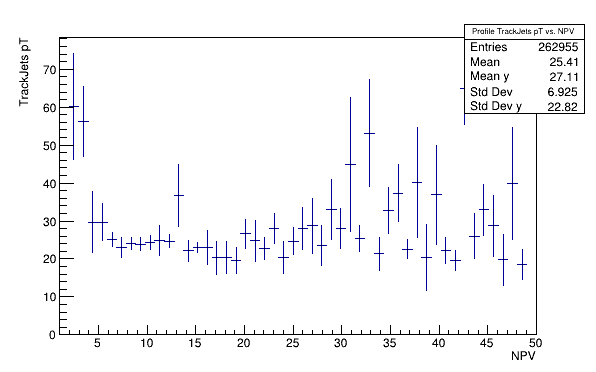

In [11]:
prof_TJpt_npv->Draw(""); canvas31->Draw();

### 3.2 Trackjets pT vs NPV no weight ###

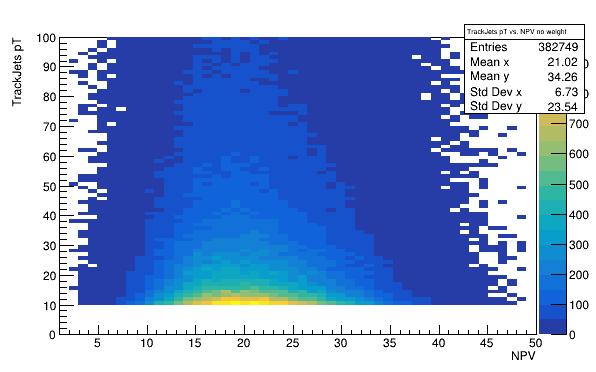

Warning in <TFile::Append>: Replacing existing TH1: Profile TrackJets pT vs. NPV (Potential memory leak).


In [12]:
TH2F *hist_TJpt_npv_noweight = new TH2F("TrackJets pT vs. NPV no weight",";NPV; TrackJets pT",50,1,50, 80, 0, 100);
TProfile *prof_TJpt_npv_noweight = new TProfile("Profile TrackJets pT vs. NPV",";NPV; TrackJets pT",50,1,50, 0, 200);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    if(TJ_R4_pt->size()!=0 && TJ_R4_pt->at(0)>20000.){
        for(int j=0; j<TJ_R4_pt->size(); j++){
        hist_TJpt_npv_noweight->Fill(npv, TJ_R4_pt->at(j)/1000.);
        prof_TJpt_npv_noweight->Fill(npv, TJ_R4_pt->at(j)/1000.);
        }
    }
}

TCanvas *canvas33 = new TCanvas("Canvas33","",600,400);
hist_TJpt_npv_noweight->Draw("colz");
canvas33->Draw();

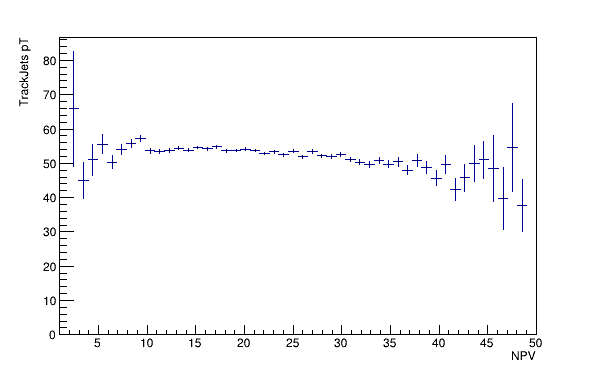

In [13]:
prof_TJpt_npv_noweight->Draw(""); prof_TJpt_npv_noweight->SetStats(0); canvas33->Draw();

### 3.3 truth-jet pT vs NPV ###

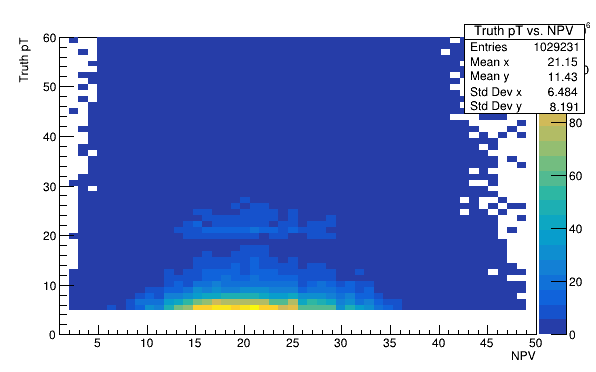

In [14]:
TH2F *hist_truthpt_npv = new TH2F("Truth pT vs. NPV",";NPV; Truth pT",50,1,50, 50, 0, 60);
TProfile *prof_truthpt_npv = new TProfile("Profile Truth pT vs. NPV",";NPV; Truth pT",50,1,50, 0, 200);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        for(int j=0; j<truth_R4_pt->size(); j++){
        hist_truthpt_npv->Fill(npv, truth_R4_pt->at(j)/1000.,evtw);
        prof_truthpt_npv->Fill(npv, truth_R4_pt->at(j)/1000.,evtw);
        }
    }
}

TCanvas *canvas32 = new TCanvas("Canvas32","",600,400);
hist_truthpt_npv->Draw("colz");
canvas32->Draw();

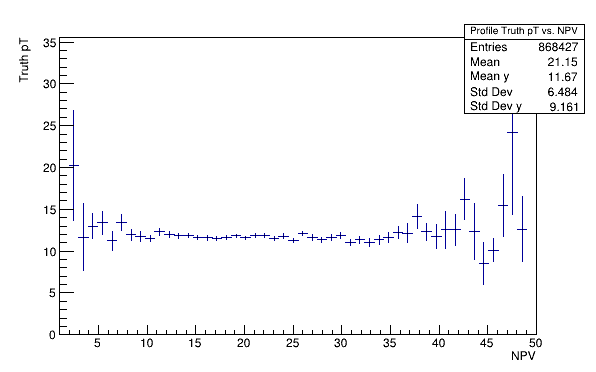

In [15]:
prof_truthpt_npv->Draw(""); canvas32->Draw();

---------------

Plot the JVF (Jet Vertex Fraction) variable

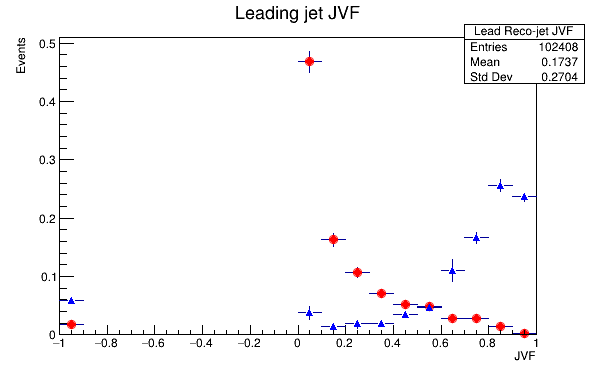

In [16]:
TH1F *hist_leadreco_jvf = new TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);
TH1F *hist_leadreco100_jvf = new TH1F("Lead Reco-jet JVF 100","Leading jet JVF; JVF;Events",20,-1,1);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        hist_leadreco_jvf->Fill(reco_R4_jvf->at(0), evtw);
        if(reco_R4_pt->at(0)>100000.){hist_leadreco100_jvf->Fill(reco_R4_jvf->at(0), evtw);}
    }
}

TCanvas *canvas4 = new TCanvas("Canvas4","",600,400);
hist_leadreco_jvf->SetMarkerStyle(20);
hist_leadreco_jvf->SetMarkerColor(kRed);
hist_leadreco_jvf->DrawNormalized("");
hist_leadreco100_jvf->SetMarkerStyle(22);
hist_leadreco100_jvf->SetMarkerColor(kBlue);
hist_leadreco100_jvf->DrawNormalized("same");
canvas4->Draw();

<b>Excercise: 
4. Use a |JVF|>0.5 cut to compare the leading jet pT for truth jets, reco jets (w.o. the cut), and reco jets (with the cut) 
5. Repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup 
</b>

### leading reco with and without |JVF|>0.5, and leading truth ###

In [17]:
TH1F *hist_leadreco_pt = new TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadreco_pt_JVF = new TH1F("Lead Reco-jet with JVF cut","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruth_pt = new TH1F("Lead Truth-jet","Leading jet pT; pT(GeV);Events",50,10,200);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0) {hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,evtw);}
    if(reco_R4_pt->size()>0 && fabs(reco_R4_jvf->at(0))>0.5) {hist_leadreco_pt_JVF->Fill(reco_R4_pt->at(0)/1000.,evtw);}
    if(truth_R4_pt->size()>0) {hist_leadtruth_pt->Fill(truth_R4_pt->at(0)/1000.,evtw);}
}

Warning in <TFile::Append>: Replacing existing TH1: Lead Reco-jet (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead Truth-jet (Potential memory leak).


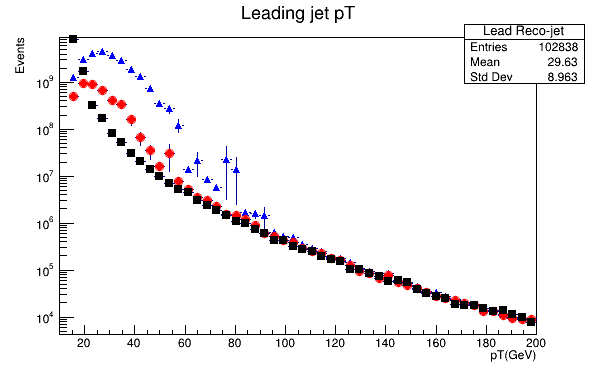

In [18]:
TCanvas *canvas41 = new TCanvas("Canvas41","",600,400);
hist_leadreco_pt->SetMarkerStyle(22);
hist_leadreco_pt->SetMarkerColor(kBlue);
hist_leadreco_pt->Draw("");
hist_leadreco_pt_JVF->SetMarkerStyle(20);
hist_leadreco_pt_JVF->SetMarkerColor(kRed);
hist_leadreco_pt_JVF->Draw("same");
hist_leadtruth_pt->SetMarkerStyle(21);
hist_leadtruth_pt->Draw("same");
canvas41->SetLogy();
canvas41->Draw();

### 5. Trackjects stability against pileup? same as before with Trackjets in addition (TJ is weighted) ###

In [19]:
TH1F *hist_leadTJ_pt = new TH1F("Lead Truth-jet","Leading jet pT; pT(GeV);Events",50,10,200);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(TJ_R4_pt->size()>0) {hist_leadTJ_pt->Fill(TJ_R4_pt->at(0)/1000.,evtw);}
}

Warning in <TFile::Append>: Replacing existing TH1: Lead Truth-jet (Potential memory leak).


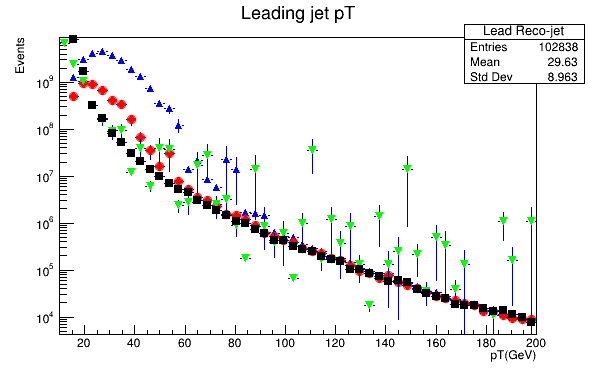

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas41


In [20]:
TCanvas *canvas41 = new TCanvas("Canvas41","",600,400);
hist_leadreco_pt->SetMarkerStyle(22);
hist_leadreco_pt->SetMarkerColor(kBlue);
hist_leadreco_pt->Draw("");
hist_leadreco_pt_JVF->SetMarkerStyle(20);
hist_leadreco_pt_JVF->SetMarkerColor(kRed);
hist_leadreco_pt_JVF->Draw("same");
hist_leadTJ_pt->SetMarkerStyle(23);
hist_leadTJ_pt->SetMarkerColor(kGreen);
hist_leadTJ_pt->Draw("same");
hist_leadtruth_pt->SetMarkerStyle(21);
hist_leadtruth_pt->Draw("same");
canvas41->SetLogy();
canvas41->Draw();

-------------

Now we will study the jet response: the ratio between the pT of the jet to the truth jet. First we should "match" the jets and the truth jets. We will use the distance DeltaR between the two, but first we should define them as four-vectors:

In [21]:
vector<float> *reco_R4_eta, *reco_R4_phi, *reco_R4_m;
vector<float> *truth_R4_eta, *truth_R4_phi, *truth_R4_m;
vector<float> *TJ_R4_eta, *TJ_R4_phi, *TJ_R4_m;

tree->SetBranchAddress("RecoJets_R4_eta", &reco_R4_eta);
tree->SetBranchAddress("RecoJets_R4_phi", &reco_R4_phi);
tree->SetBranchAddress("RecoJets_R4_m", &reco_R4_m);
tree->SetBranchAddress("TruthJets_R4_eta", &truth_R4_eta);
tree->SetBranchAddress("TruthJets_R4_phi", &truth_R4_phi);
tree->SetBranchAddress("TruthJets_R4_m", &truth_R4_m);
tree->SetBranchAddress("TrackJets_R4_eta", &TJ_R4_eta);
tree->SetBranchAddress("TrackJets_R4_phi", &TJ_R4_phi);
tree->SetBranchAddress("TrackJets_R4_m", &TJ_R4_m);

Defining a delta R max range for the plots

In [22]:
float DR = 1;

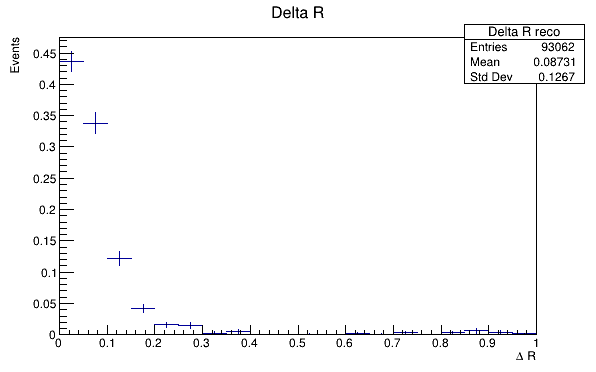

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas2


In [23]:
TH1F *hist_DR_reco_truth = new TH1F("Delta R reco","Delta R; #Delta R; Events",20,0,DR);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
        if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
            TLorentzVector recoJet;
            recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
 
            //Plot the Delta R
            hist_DR_reco_truth->Fill(truthJet.DeltaR(recoJet),evtw);
        }
    }
}

TCanvas *canvas2 = new TCanvas("Canvas2","",600,400);
hist_DR_reco_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_DR_reco_truth->DrawNormalized("");
canvas2->Draw();

--------------

### 6. Repeat for track-jets and make a plot comparing three cases: reco-jets with and without the JVF cut, and track-jets 

### 6.1 reco-truth without JVF cut ###

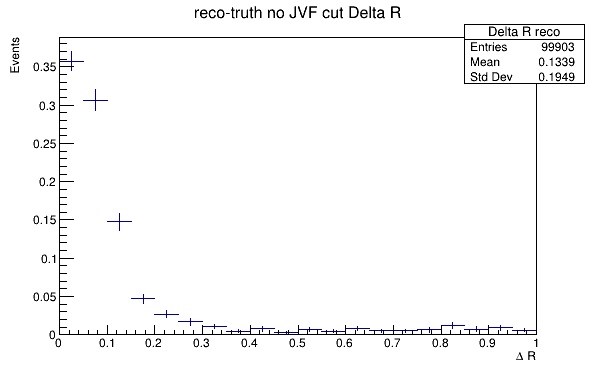

Warning in <TFile::Append>: Replacing existing TH1: Delta R reco (Potential memory leak).


In [24]:
TH1F *hist_DR_reco_truth_nocut = new TH1F("Delta R reco","reco-truth no JVF cut Delta R; #Delta R; Events",20,0,DR);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
        if(reco_R4_pt->size()!=0){
            TLorentzVector recoJet;
            recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
 
            //Plot the Delta R
            hist_DR_reco_truth_nocut->Fill(truthJet.DeltaR(recoJet),evtw);
        }
    }
}

TCanvas *canvas61 = new TCanvas("Canvas61","",600,400);
hist_DR_reco_truth_nocut->Scale(1/hist_DR_reco_truth_nocut->Integral());
hist_DR_reco_truth_nocut->DrawNormalized("");
canvas61->Draw();

### 6.2 TrackJets-truth  ###

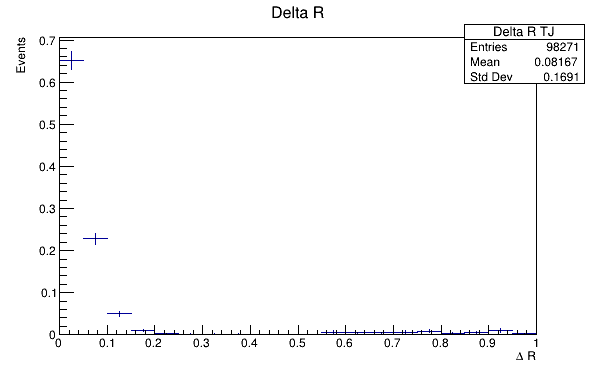

In [25]:
TH1F *hist_DR_TJ_truth = new TH1F("Delta R TJ","Delta R; #Delta R; Events",20,0,DR);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
        if(TJ_R4_pt->size()!=0){
            TLorentzVector TJJet;
            TJJet.SetPtEtaPhiM(TJ_R4_pt->at(0),TJ_R4_eta->at(0),TJ_R4_phi->at(0),TJ_R4_m->at(0));        
 
            //Plot the Delta R
            hist_DR_TJ_truth->Fill(truthJet.DeltaR(TJJet),evtw);
        }
    }
}

TCanvas *canvas62 = new TCanvas("Canvas62","",600,400);
hist_DR_TJ_truth->Scale(1/hist_DR_TJ_truth->Integral());
hist_DR_TJ_truth->DrawNormalized("");
canvas62->Draw();

### 6.3 all three cases ###

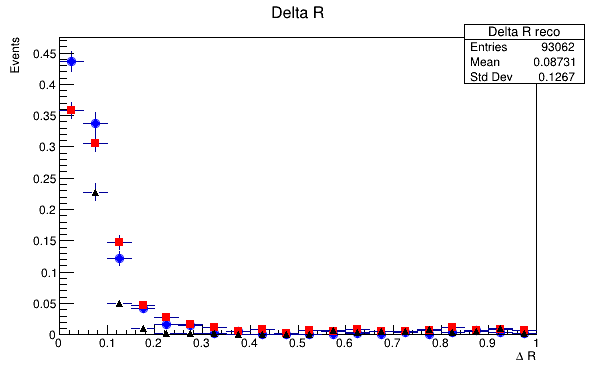

In [26]:
TCanvas *canvasR = new TCanvas("CanvasR","",600,400);
hist_DR_reco_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_DR_reco_truth->SetMarkerColor(kBlue);
hist_DR_reco_truth->SetMarkerStyle(20);
hist_DR_reco_truth->DrawNormalized("");
hist_DR_reco_truth_nocut->Scale(1/hist_DR_reco_truth_nocut->Integral());
hist_DR_reco_truth_nocut->SetMarkerColor(kRed);
hist_DR_reco_truth_nocut->SetMarkerStyle(21); 
hist_DR_reco_truth_nocut->DrawNormalized("same");
hist_DR_TJ_truth->Scale(1/hist_DR_TJ_truth->Integral());
hist_DR_TJ_truth->SetMarkerStyle(22); 
hist_DR_TJ_truth->DrawNormalized("same");
// canvasR->SetLogy();
// canvasR->SaveAs("img logDR_all_three_range5.png");
canvasR->Draw();

--------------

### 7 Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).

In [27]:
TH1F *hist_reco_truth_matched = new TH1F("reco-truth response","Response reco/truth pT; pTjet/pTtruth; Events",50,0,2);
TH1F *hist_reco_truth_matched_100 = new TH1F("reco-truth response 100","; pTjet/pTtruth; Events",50,0,2);
TH1F *hist_reco_truth_matched_500 = new TH1F("reco-truth response 500","; pTjet/pTtruth; Events",50,0,2);

TH1F *hist_TJ_truth_matched = new TH1F("TrackJet-truth response","Response TrackJet/truth pT; pTjet/pTtruth; Events",50,0,2);
TH1F *hist_TJ_truth_matched_100 = new TH1F("TrackJet-truth response","; pTjet/pTtruth; Events",50,0,2);
TH1F *hist_TJ_truth_matched_500 = new TH1F("TrackJet-truth response","; pTjet/pTtruth; Events",50,0,2);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));    
        
        if(reco_R4_pt->size()!=0){
            TLorentzVector recoJet;
            recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
            
            if(truthJet.DeltaR(recoJet)<0.3) {
                hist_reco_truth_matched->Fill(recoJet.Pt()/truthJet.Pt(),evtw);
                if (truth_R4_pt->at(0)>100e3) {
                    hist_reco_truth_matched_100->Fill(recoJet.Pt()/truthJet.Pt(),evtw);
                    if (truth_R4_pt->at(0)>500e3)
                        {hist_reco_truth_matched_500->Fill(recoJet.Pt()/truthJet.Pt(),evtw);}
                }
            }
        }
        if(TJ_R4_pt->size()!=0){
            TLorentzVector TJJet;
            TJJet.SetPtEtaPhiM(TJ_R4_pt->at(0),TJ_R4_eta->at(0),TJ_R4_phi->at(0),TJ_R4_m->at(0));        
            
            if(truthJet.DeltaR(TJJet)<0.3) {
                hist_TJ_truth_matched->Fill(TJJet.Pt()/truthJet.Pt(),evtw);
                if (truth_R4_pt->at(0)>100e3) {
                    hist_TJ_truth_matched_100->Fill(TJJet.Pt()/truthJet.Pt(),evtw);
                    if (truth_R4_pt->at(0)>500e3)
                        {hist_TJ_truth_matched_500->Fill(TJJet.Pt()/truthJet.Pt(),evtw);}
                }
            }
        }
    }
}

Warning in <TFile::Append>: Replacing existing TH1: TrackJet-truth response (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: TrackJet-truth response (Potential memory leak).


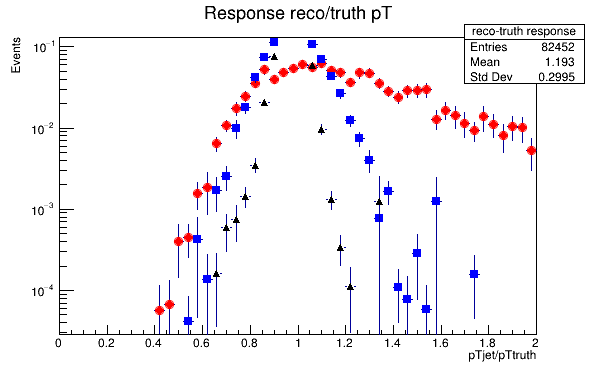

In [28]:
TCanvas *canvas71 = new TCanvas("Canvas71","",600,400);
hist_reco_truth_matched->SetMarkerStyle(20);
hist_reco_truth_matched->SetMarkerColor(kRed);
hist_reco_truth_matched->DrawNormalized("");
hist_reco_truth_matched_100->SetMarkerStyle(21);
hist_reco_truth_matched_100->SetMarkerColor(kBlue);
hist_reco_truth_matched_100->DrawNormalized("same");
hist_reco_truth_matched_500->SetMarkerStyle(22);
hist_reco_truth_matched_500->DrawNormalized("same");
canvas71->SetLogy(); canvas71->Draw();

In the previous plot, most responses ($pTjet/pTtruth$ for each event) are concentrated around ~1, which means somewhat that $pTjet \approx pTtruth$. It's a good sign of a well reconstructed jet from the calorimeter information.

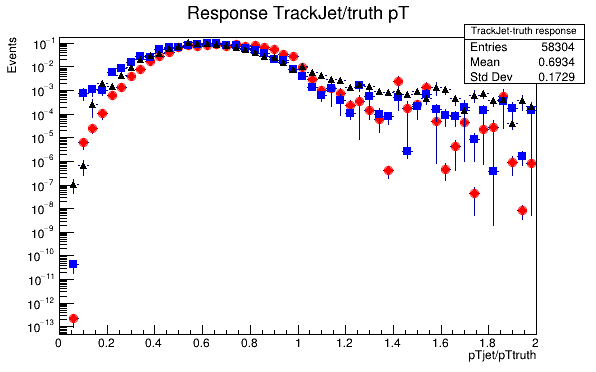

In [29]:
TCanvas *canvas72 = new TCanvas("Canvas72","",600,400);
hist_TJ_truth_matched->SetMarkerStyle(20);
hist_TJ_truth_matched->SetMarkerColor(kRed);
hist_TJ_truth_matched->DrawNormalized("");
hist_TJ_truth_matched_100->SetMarkerStyle(21);
hist_TJ_truth_matched_100->SetMarkerColor(kBlue);
hist_TJ_truth_matched_100->DrawNormalized("same");
hist_TJ_truth_matched_500->SetMarkerStyle(22);
hist_TJ_truth_matched_500->DrawNormalized("same");
canvas72->SetLogy(); canvas72->Draw();

In the previous plot, most responses ($pTjet/pTtruth$ for each event) are concentrated around ~0.65, which means that $pTjet < pTtruth$. It makes sense and could be due to the fact that the tracker ignores many neutral particles that would contribute significantly to the real Jet pT. 

--------------

### 8 Investigate the Large-R jets: 
    (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets
    (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets
    (c) Compare all plots. How can you explain the differences?
    (d) Make the same comparisson for the jet mass. 

All the R10 necessary variables

In [30]:
vector<float> *truth_R10_pt, *truth_R10_eta, *truth_R10_phi, *truth_R10_m;
vector<float> *reco_R10_pt, *reco_R10_eta, *reco_R10_phi, *reco_R10_m;
vector<float> *truth_R10_Trimmed_pt, *truth_R10_Trimmed_eta, *truth_R10_Trimmed_phi, *truth_R10_Trimmed_m;
vector<float> *reco_R10_Trimmed_pt, *reco_R10_Trimmed_eta, *reco_R10_Trimmed_phi, *reco_R10_Trimmed_m;

tree->SetBranchAddress("TruthJets_R10_pt", &truth_R10_pt); tree->SetBranchAddress("TruthJets_R10_eta", &truth_R10_eta);
tree->SetBranchAddress("TruthJets_R10_phi", &truth_R10_phi); tree->SetBranchAddress("TruthJets_R10_m", &truth_R10_m);
tree->SetBranchAddress("RecoJets_R10_pt", &reco_R10_pt); tree->SetBranchAddress("RecoJets_R10_eta", &reco_R10_eta);
tree->SetBranchAddress("RecoJets_R10_phi", &reco_R10_phi); tree->SetBranchAddress("RecoJets_R10_m", &reco_R10_m);
tree->SetBranchAddress("TruthJets_R10_Trimmed_pt", &truth_R10_Trimmed_pt); tree->SetBranchAddress("TruthJets_R10_Trimmed_eta", &truth_R10_Trimmed_eta);
tree->SetBranchAddress("TruthJets_R10_Trimmed_phi", &truth_R10_Trimmed_phi); tree->SetBranchAddress("TruthJets_R10_Trimmed_m", &truth_R10_Trimmed_m);
tree->SetBranchAddress("RecoJets_R10_Trimmed_pt", &reco_R10_Trimmed_pt); tree->SetBranchAddress("RecoJets_R10_Trimmed_eta", &reco_R10_Trimmed_eta);
tree->SetBranchAddress("RecoJets_R10_Trimmed_phi", &reco_R10_Trimmed_phi); tree->SetBranchAddress("RecoJets_R10_Trimmed_m", &reco_R10_Trimmed_m);

### a. Leading jet pT for R10 reco and reco_Trimmed ###

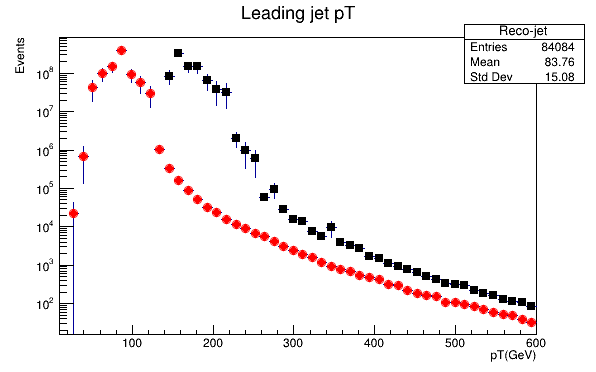

Warning in <TFile::Append>: Replacing existing TH1: Lead Reco-jet (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Reco-jet (Potential memory leak).


In [31]:
TH1F *hist_leadreco_pt = new TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,600);
TH1F *hist_leadreco_Trimmed_pt = new TH1F("Reco-jet","Leading jet pT; pT(GeV);Events",50,10,600);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R10_pt->size()>0){
        hist_leadreco_pt->Fill(reco_R10_pt->at(0)/1000.,evtw);  
    }
    
    if(reco_R10_Trimmed_pt->size()>0){
        hist_leadreco_Trimmed_pt->Fill(reco_R10_Trimmed_pt->at(0)/1000.,evtw);  
    }
}

TCanvas *canvas8a = new TCanvas("Canvas8a","",600,400);
hist_leadreco_Trimmed_pt->SetMarkerStyle(20); 
hist_leadreco_Trimmed_pt->SetMarkerColor(kRed);
hist_leadreco_Trimmed_pt->Draw("");
hist_leadreco_pt->SetMarkerStyle(21);
hist_leadreco_pt->Draw("same");
canvas8a->SetLogy();
canvas8a->Draw();

### b. Leading jet pT for R10 truth and truth_Trimmed ###

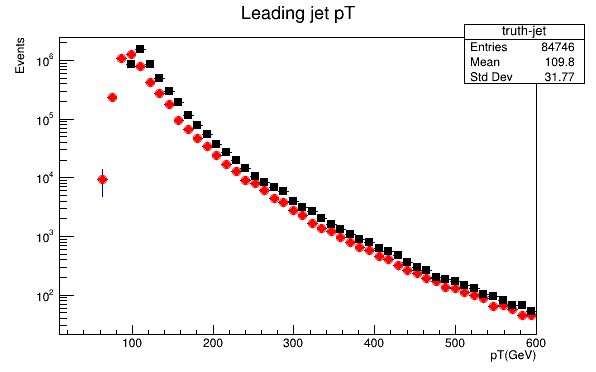

In [32]:
TH1F *hist_leadtruth_pt = new TH1F("Lead truth-jet","Leading jet pT; pT(GeV);Events",50,10,600);
TH1F *hist_leadtruth_Trimmed_pt = new TH1F("truth-jet","Leading jet pT; pT(GeV);Events",50,10,600);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(truth_R10_pt->size()>0){
        hist_leadtruth_pt->Fill(truth_R10_pt->at(0)/1000.,evtw);  
    }
    
    if(truth_R10_Trimmed_pt->size()>0){
        hist_leadtruth_Trimmed_pt->Fill(truth_R10_Trimmed_pt->at(0)/1000.,evtw);  
    }
}

TCanvas *canvas8b = new TCanvas("Canvas8b","",600,400);
hist_leadtruth_Trimmed_pt->SetMarkerStyle(20); 
hist_leadtruth_Trimmed_pt->SetMarkerColor(kRed);
hist_leadtruth_Trimmed_pt->Draw("");
hist_leadtruth_pt->SetMarkerStyle(21);
hist_leadtruth_pt->Draw("same");
canvas8b->SetLogy();
canvas8b->Draw();

### c. All plots ###

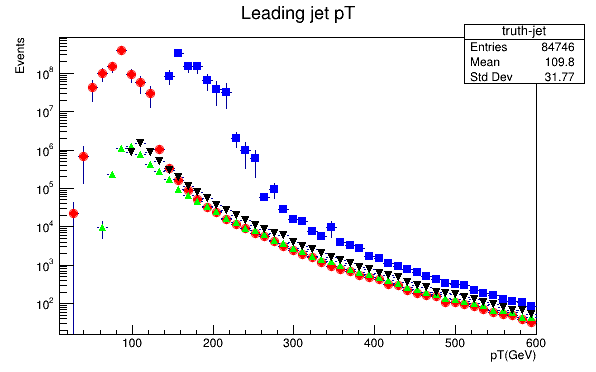

In [33]:
TCanvas *canvas8c = new TCanvas("Canvas8c","",600,400);
hist_leadreco_Trimmed_pt->SetMarkerStyle(20); 
hist_leadreco_Trimmed_pt->SetMarkerColor(kRed);
hist_leadreco_Trimmed_pt->Draw("");
hist_leadreco_pt->SetMarkerStyle(21);
hist_leadreco_pt->SetMarkerColor(kBlue);
hist_leadreco_pt->Draw("same");
hist_leadtruth_Trimmed_pt->SetMarkerStyle(22); 
hist_leadtruth_Trimmed_pt->SetMarkerColor(kGreen);
hist_leadtruth_Trimmed_pt->Draw("same");
hist_leadtruth_pt->SetMarkerStyle(23);
hist_leadtruth_pt->Draw("same");
canvas8c->SetLogy();
canvas8c->Draw();

### more on the large jets ###

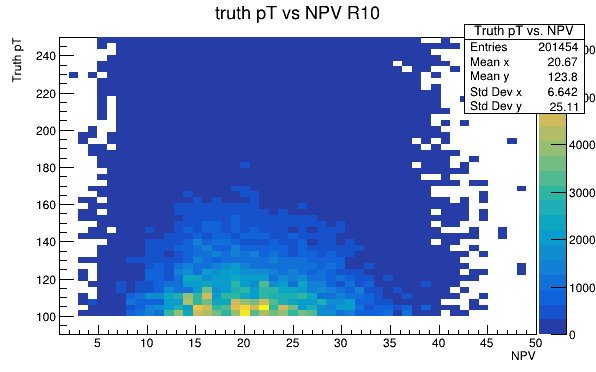

Warning in <TFile::Append>: Replacing existing TH1: Truth pT vs. NPV (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Profile Truth pT vs. NPV (Potential memory leak).


In [34]:
TH2F *hist_truthpt_npv = new TH2F("Truth pT vs. NPV","truth pT vs NPV R10;NPV; Truth pT",50,1,50, 50, 90, 250);
TProfile *prof_truthpt_npv = new TProfile("Profile Truth pT vs. NPV",";NPV; Truth pT",50,1,50, 0, 300);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    if(truth_R10_pt->size()!=0 && truth_R10_pt->at(0)>20000.){
        for(int j=0; j<truth_R10_pt->size(); j++){
        hist_truthpt_npv->Fill(npv, truth_R10_pt->at(j)/1000.,evtw);
        prof_truthpt_npv->Fill(npv, truth_R10_pt->at(j)/1000.,evtw);
        }
    }
}

TCanvas *canvas8m = new TCanvas("Canvas8m","",600,400);
hist_truthpt_npv->Draw("colz");
canvas8m->Draw();

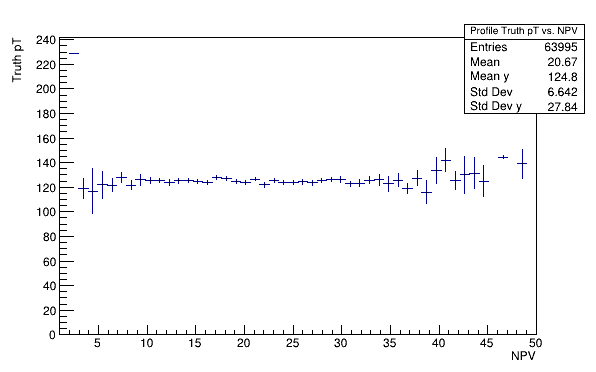

In [35]:
prof_truthpt_npv->Draw(""); canvas8m->Draw();

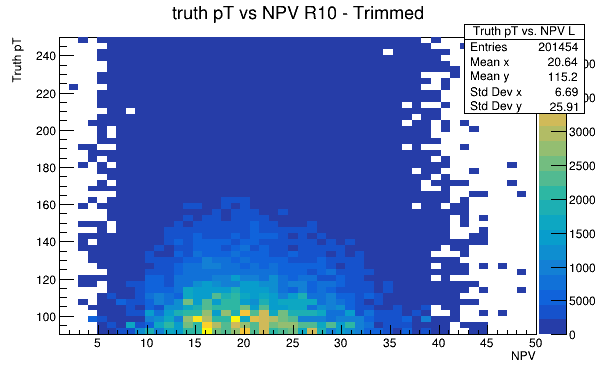

In [36]:
TH2F *hist_truthpt_npv = new TH2F("Truth pT vs. NPV L","truth pT vs NPV R10 - Trimmed;NPV; Truth pT",50,1,50, 50, 90, 250);
TProfile *prof_truthpt_npv = new TProfile("Profile Truth pT vs. NPV L",";NPV; Truth pT",50,1,50, 0, 300);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    if(truth_R10_Trimmed_pt->size()!=0 && truth_R10_Trimmed_pt->at(0)>20000.){
        for(int j=0; j<truth_R10_Trimmed_pt->size(); j++){
        hist_truthpt_npv->Fill(npv, truth_R10_Trimmed_pt->at(j)/1000.,evtw);
        prof_truthpt_npv->Fill(npv, truth_R10_Trimmed_pt->at(j)/1000.,evtw);
        }
    }
}

TCanvas *canvas8m2 = new TCanvas("Canvas8m2","",600,400);
hist_truthpt_npv->Draw("colz");
canvas8m2->Draw();

### d. mass of the leading jet analysis ###

Defining a range (-range,range) for the mass histograms

In [37]:
float range = 1000;

In [38]:
TH1F *hist_reco_m = new TH1F("Reco-jet mass","Leading jet m; m;Events",200,-range,range);
TH1F *hist_reco_Trimmed_m = new TH1F("Reco-Trimmed-jet mass","Leading jet m; m;Events",200,-range,range);
TH1F *hist_truth_m = new TH1F(" truth-jet mass","Leading jet m; m;Events",200,-range,range);
TH1F *hist_truth_Trimmed_m = new TH1F("truth-Trimmed-jet mass","Leading jet m; m;Events",200,-range,range);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R10_m->size()>0) {
        for(int j=0; j<reco_R10_m->size(); j++) {hist_reco_m->Fill(reco_R10_m->at(j));}}
    if(reco_R10_Trimmed_m->size()>0) {
        for(int j=0; j<reco_R10_Trimmed_m->size(); j++) {hist_reco_Trimmed_m->Fill(reco_R10_Trimmed_m->at(j));}}
    if(truth_R10_m->size()>0) {
        for(int j=0; j<truth_R10_m->size(); j++) {hist_truth_m->Fill(truth_R10_m->at(j));}}
    if(truth_R10_Trimmed_m->size()>0) {
        for(int j=0; j<truth_R10_Trimmed_m->size(); j++) {hist_truth_Trimmed_m->Fill(truth_R10_Trimmed_m->at(j));}}
}

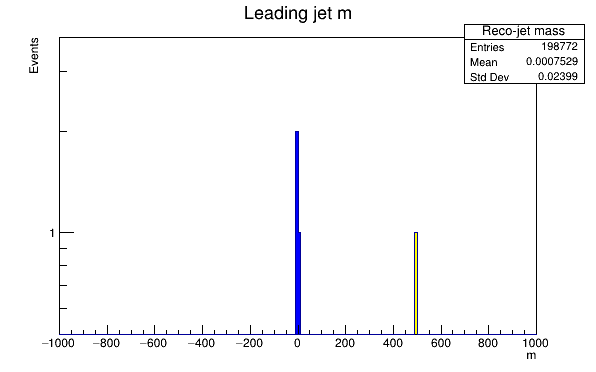

In [39]:
TCanvas *canvas8d = new TCanvas("Canvas8d","",600,400);
hist_reco_m->SetFillColor(4);
hist_reco_m->Draw("");
hist_truth_m->SetFillColor(5);
hist_truth_m->Draw("same");
canvas8d->SetLogy();
canvas8d->Draw();

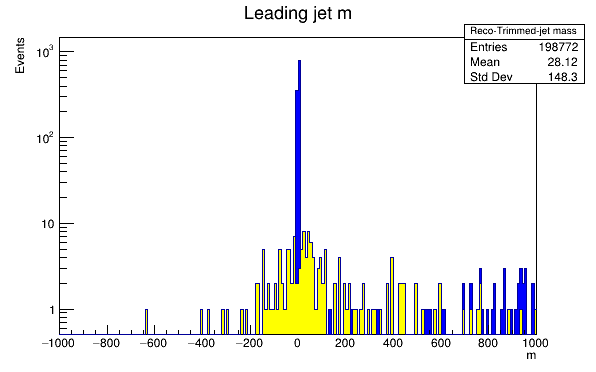

In [40]:
TCanvas *canvas8d2 = new TCanvas("Canvas8d2","",600,400);
hist_reco_Trimmed_m->SetFillColor(4); //blue
hist_reco_Trimmed_m->Draw("");
hist_truth_Trimmed_m->SetFillColor(5); //yellow
hist_truth_Trimmed_m->Draw("same");
canvas8d2->SetLogy();
// canvas8d2->SaveAs("img bins200range200.png");
canvas8d2->Draw();

--------------